In [29]:
import pandas as pd
import plotly.graph_objects as go
import matplotlib.pyplot as plt

In [3]:
df_algeria = pd.read_csv("C:/Users/Johnny/Downloads/Algerian_forest_fires_dataset_UPDATE.csv")

In [4]:
df_portugal = pd.read_csv("C:/Users/Johnny/Downloads/forestfires.csv")

In [5]:
df_algeria[0:-5]

Bejaia Region Dataset 
day month year Temperature  RH  Ws Rain  FFMC DMC  DC    ISI  BUI  FWI               Classes  
01  06    2012 29          57  18  0     65.7 3.4  7.6   1.3  3.4  0.5             not fire   
02  06    2012 29          61  13  1.3   64.4 4.1  7.6   1    3.9  0.4             not fire   
03  06    2012 26          82  22  13.1  47.1 2.5  7.1   0.3  2.7  0.1             not fire   
04  06    2012 25          89  13  2.5   28.6 1.3  6.9   0    1.7  0               not fire   
...                                                                                        ...
21  09    2012 35          34  17  0     92.2 23.6 97.3  13.8 29.4 21.6                fire   
22  09    2012 33          64  13  0     88.9 26.1 106.3 7.1  32.4 13.7                fire   
23  09    2012 35          56  14  0     89   29.4 115.6 7.5  36   15.2                fire   
24  09    2012 26          49  6   2     61.3 11.9 28.1  0.6  11.9 0.4             not fire   
25  09    2012 28          70  15  0     79.9 13.8 36.1  2.4  14.1 3               not fire   

[242 rows x 1 columns]

In [6]:
df_portugal[0:-5]

X  Y month  day  FFMC    DMC     DC  ISI  temp  RH  wind  rain  area
0    7  5   mar  fri  86.2   26.2   94.3  5.1   8.2  51   6.7   0.0  0.00
1    7  4   oct  tue  90.6   35.4  669.1  6.7  18.0  33   0.9   0.0  0.00
2    7  4   oct  sat  90.6   43.7  686.9  6.7  14.6  33   1.3   0.0  0.00
3    8  6   mar  fri  91.7   33.3   77.5  9.0   8.3  97   4.0   0.2  0.00
4    8  6   mar  sun  89.3   51.3  102.2  9.6  11.4  99   1.8   0.0  0.00
..  .. ..   ...  ...   ...    ...    ...  ...   ...  ..   ...   ...   ...
507  2  4   aug  fri  91.0  166.9  752.6  7.1  25.9  41   3.6   0.0  0.00
508  1  2   aug  fri  91.0  166.9  752.6  7.1  25.9  41   3.6   0.0  0.00
509  5  4   aug  fri  91.0  166.9  752.6  7.1  21.1  71   7.6   1.4  2.17
510  6  5   aug  fri  91.0  166.9  752.6  7.1  18.2  62   5.4   0.0  0.43
511  8  6   aug  sun  81.6   56.7  665.6  1.9  27.8  35   2.7   0.0  0.00

[512 rows x 13 columns]

In [7]:
copy_df_algeria = df_algeria
copy_df_portugal = df_portugal

In [8]:
classes_list = copy_df_algeria['Bejaia Region Dataset ']
classes_list = classes_list.reset_index()
header = classes_list.iloc[0:]
header = header.loc[0]
classes_list.columns = header
copy_df_algeria = classes_list.iloc[1:]

In [9]:
copy_df_algeria = copy_df_algeria.drop(['day', 'month', 'year', 'BUI', 'FWI'], axis=1)

In [10]:
copy_df_algeria.columns = ['Temp', 'Humidity', 'Wind', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'Actual Fire']
copy_df_algeria = copy_df_algeria.drop([124])
copy_df_algeria

Temp Humidity Wind  Rain  FFMC  DMC    DC  ISI   Actual Fire
1     29       57   18     0  65.7  3.4   7.6  1.3   not fire   
2     29       61   13   1.3  64.4  4.1   7.6    1   not fire   
3     26       82   22  13.1  47.1  2.5   7.1  0.3   not fire   
4     25       89   13   2.5  28.6  1.3   6.9    0   not fire   
5     27       77   16     0  64.8    3  14.2  1.2   not fire   
..   ...      ...  ...   ...   ...  ...   ...  ...           ...
242   30       65   14     0  85.4   16  44.5  4.5       fire   
243   28       87   15   4.4  41.1  6.5     8  0.1   not fire   
244   27       87   29   0.5  45.9  3.5   7.9  0.4   not fire   
245   24       54   18   0.1  79.7  4.3  15.2  1.7   not fire   
246   24       64   15   0.2  67.3  3.8  16.5  1.2  not fire    

[245 rows x 9 columns]

In [11]:
copy_df_algeria['DC'] = pd.to_numeric(copy_df_algeria['DC'],errors='coerce')
copy_df_algeria['Actual Fire'] = copy_df_algeria['Actual Fire'].str.strip()
copy_df_algeria['Actual Fire'] = copy_df_algeria['Actual Fire'].replace({'not fire': 0.0,'fire': 1.0,})
for i in copy_df_algeria.columns:
    copy_df_algeria[i] = copy_df_algeria[i].astype(float)
copy_df_algeria = copy_df_algeria.dropna(how='all')
copy_df_algeria

Temp  Humidity  Wind  Rain  FFMC   DMC    DC  ISI  Actual Fire
1    29.0      57.0  18.0   0.0  65.7   3.4   7.6  1.3          0.0
2    29.0      61.0  13.0   1.3  64.4   4.1   7.6  1.0          0.0
3    26.0      82.0  22.0  13.1  47.1   2.5   7.1  0.3          0.0
4    25.0      89.0  13.0   2.5  28.6   1.3   6.9  0.0          0.0
5    27.0      77.0  16.0   0.0  64.8   3.0  14.2  1.2          0.0
..    ...       ...   ...   ...   ...   ...   ...  ...          ...
242  30.0      65.0  14.0   0.0  85.4  16.0  44.5  4.5          1.0
243  28.0      87.0  15.0   4.4  41.1   6.5   8.0  0.1          0.0
244  27.0      87.0  29.0   0.5  45.9   3.5   7.9  0.4          0.0
245  24.0      54.0  18.0   0.1  79.7   4.3  15.2  1.7          0.0
246  24.0      64.0  15.0   0.2  67.3   3.8  16.5  1.2          0.0

[244 rows x 9 columns]

In [12]:
copy_df_portugal = copy_df_portugal.drop(columns=['X', 'Y', 'month', 'day'], axis=1)
copy_df_portugal

FFMC    DMC     DC   ISI  temp  RH  wind  rain   area
0    86.2   26.2   94.3   5.1   8.2  51   6.7   0.0   0.00
1    90.6   35.4  669.1   6.7  18.0  33   0.9   0.0   0.00
2    90.6   43.7  686.9   6.7  14.6  33   1.3   0.0   0.00
3    91.7   33.3   77.5   9.0   8.3  97   4.0   0.2   0.00
4    89.3   51.3  102.2   9.6  11.4  99   1.8   0.0   0.00
..    ...    ...    ...   ...   ...  ..   ...   ...    ...
512  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0   6.44
513  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  54.29
514  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  11.16
515  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0   0.00
516  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0   0.00

[517 rows x 9 columns]

In [13]:
copy_df_portugal.columns = ['FFMC', 'DMC', 'DC', 'ISI', 'Temp', 'Humidity', 'Wind', 'Rain', 'Actual Fire']
copy_df_portugal = copy_df_portugal.reindex(columns = ['Temp', 'Humidity', 'Wind', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'Actual Fire'])
copy_df_portugal['Humidity'] = copy_df_portugal['Humidity'].astype(float)
copy_df_portugal['Actual Fire'] = copy_df_portugal['Actual Fire'].apply(lambda x: 1.0 if x > 0 else 0.0)
copy_df_portugal = copy_df_portugal.dropna(how='all')
copy_df_portugal

Temp  Humidity  Wind  Rain  FFMC    DMC     DC   ISI  Actual Fire
0     8.2      51.0   6.7   0.0  86.2   26.2   94.3   5.1          0.0
1    18.0      33.0   0.9   0.0  90.6   35.4  669.1   6.7          0.0
2    14.6      33.0   1.3   0.0  90.6   43.7  686.9   6.7          0.0
3     8.3      97.0   4.0   0.2  91.7   33.3   77.5   9.0          0.0
4    11.4      99.0   1.8   0.0  89.3   51.3  102.2   9.6          0.0
..    ...       ...   ...   ...   ...    ...    ...   ...          ...
512  27.8      32.0   2.7   0.0  81.6   56.7  665.6   1.9          1.0
513  21.9      71.0   5.8   0.0  81.6   56.7  665.6   1.9          1.0
514  21.2      70.0   6.7   0.0  81.6   56.7  665.6   1.9          1.0
515  25.6      42.0   4.0   0.0  94.4  146.0  614.7  11.3          0.0
516  11.8      31.0   4.5   0.0  79.5    3.0  106.7   1.1          0.0

[517 rows x 9 columns]

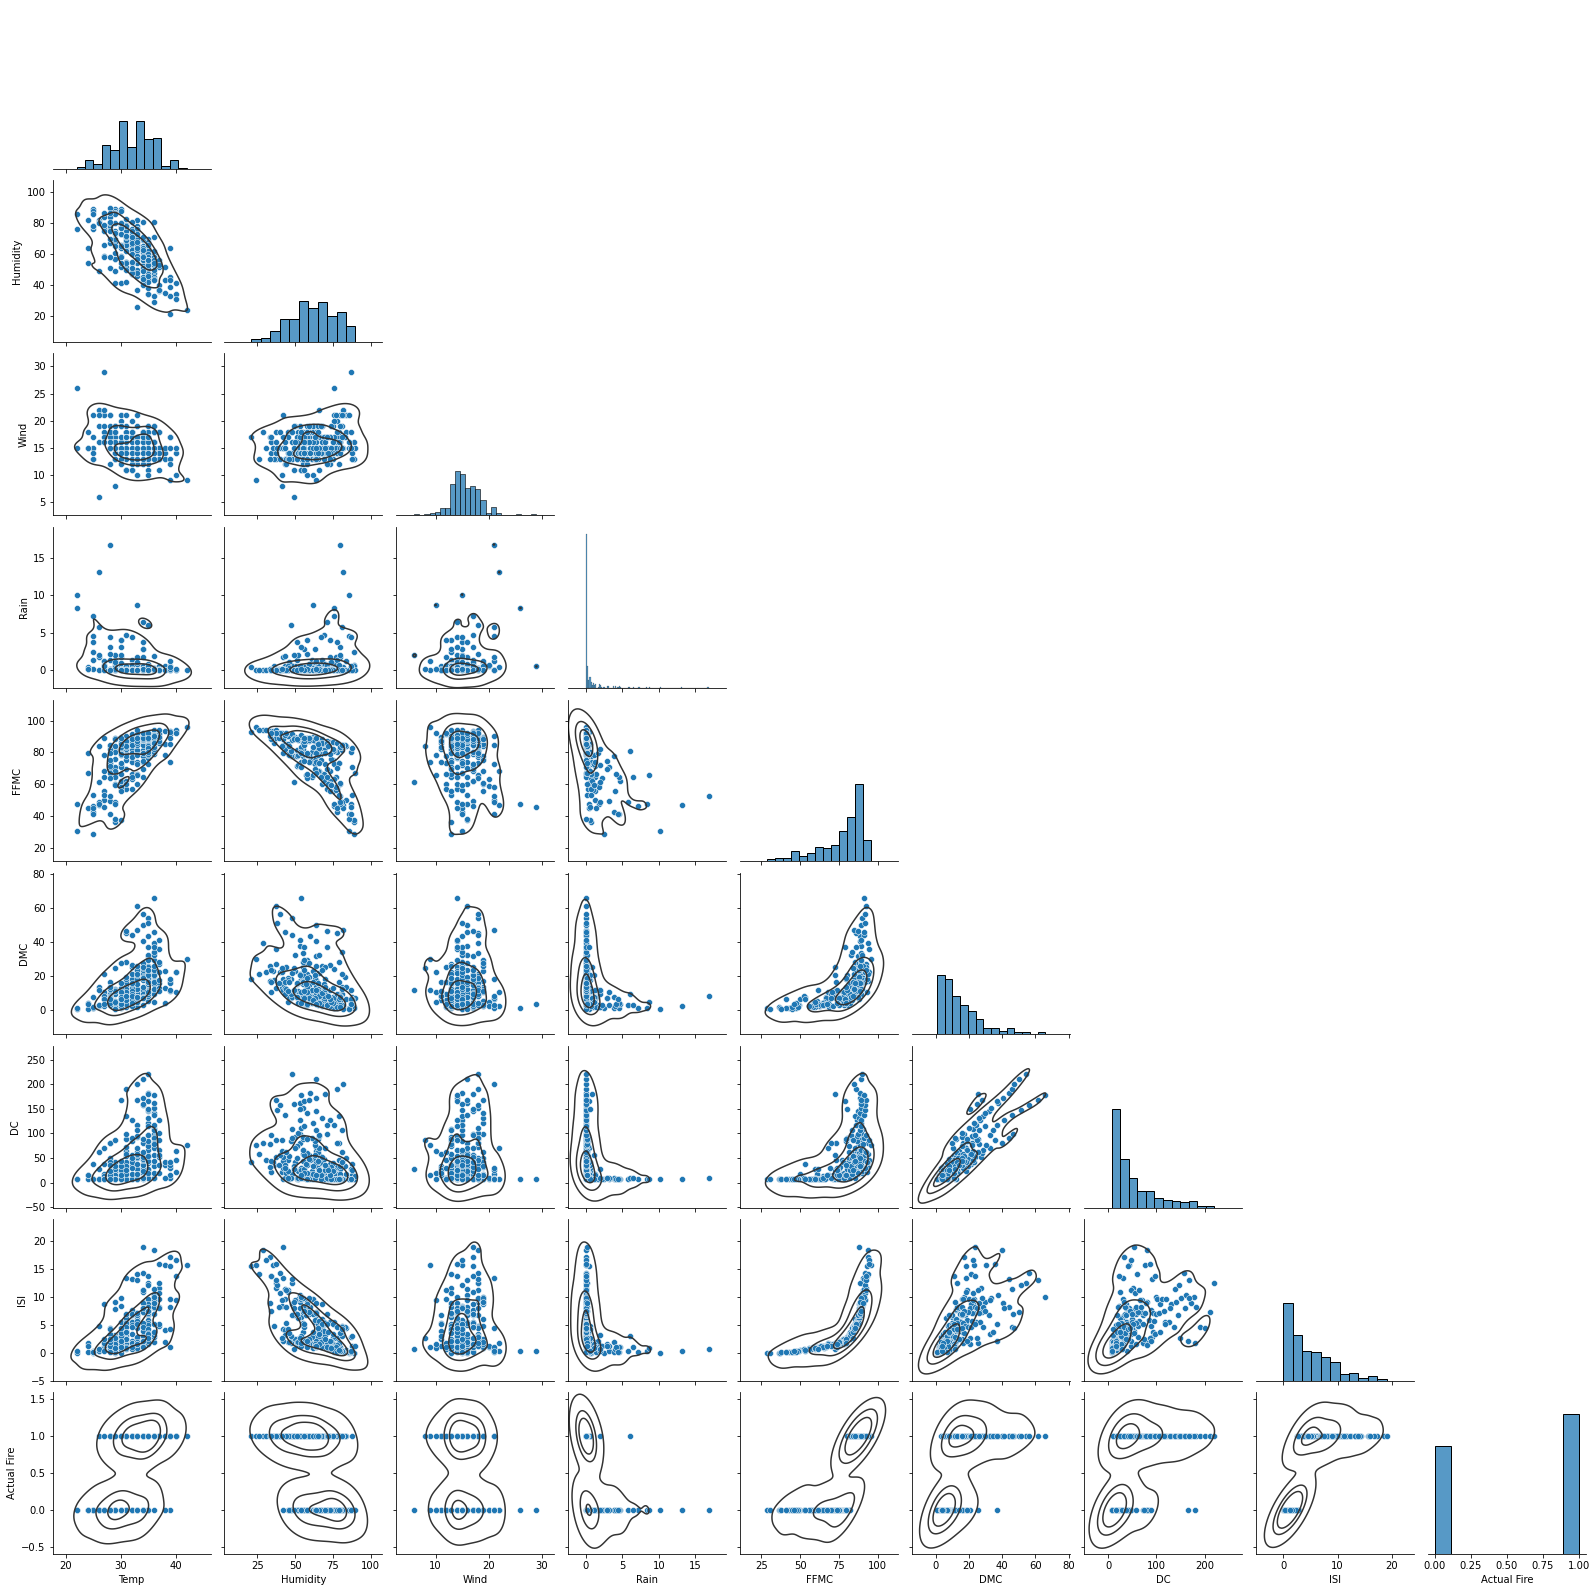

In [14]:
import seaborn as sns
pairplot = sns.pairplot(copy_df_algeria, diag_kind="hist",  corner=True)
pairplot.map_lower(sns.kdeplot, levels=4, color=".2")

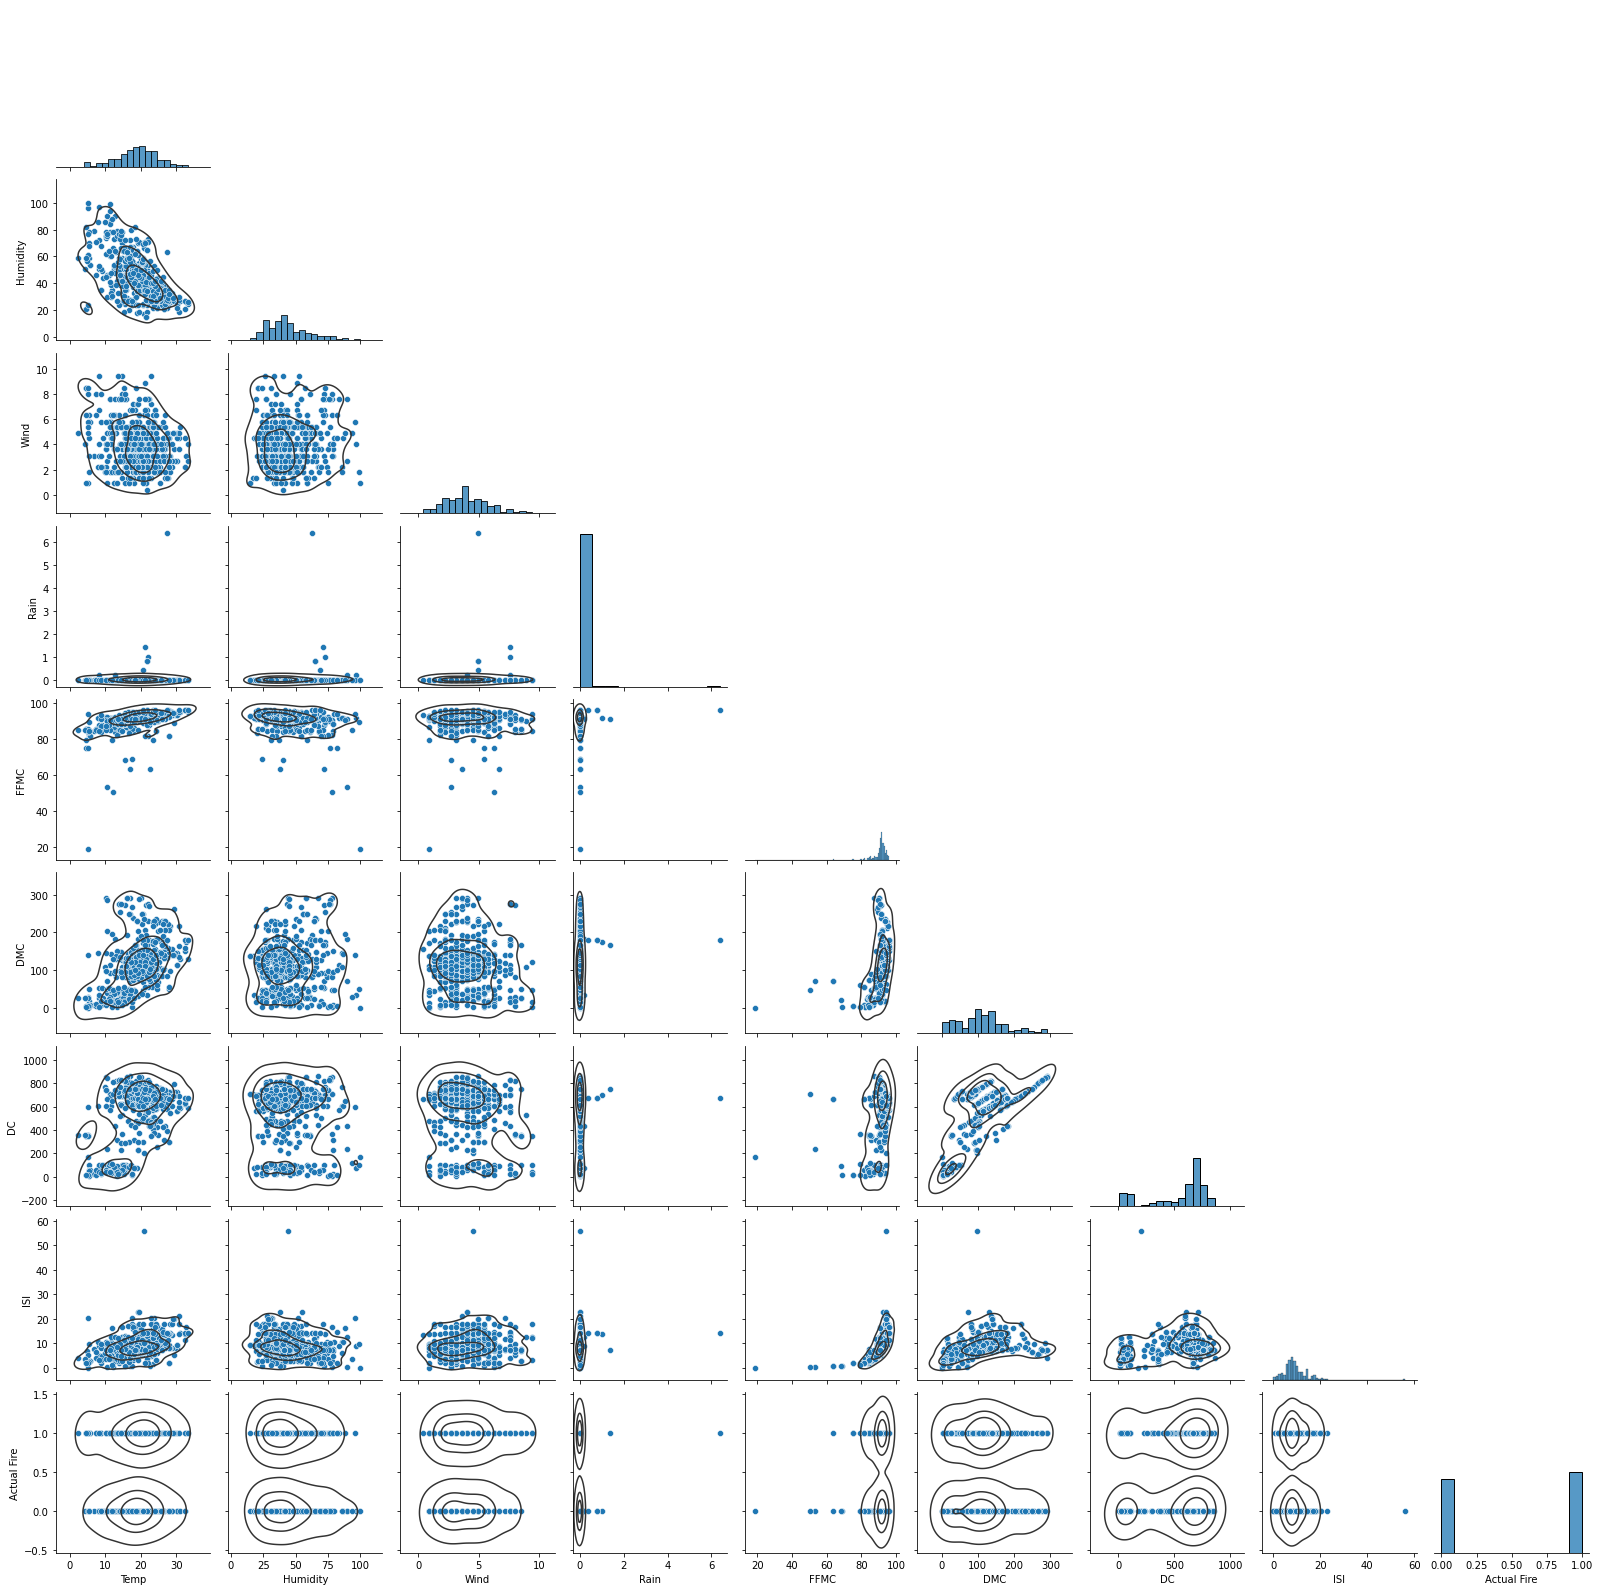

In [15]:
pairplot_port = sns.pairplot(copy_df_portugal, diag_kind="hist",  corner=True)
pairplot_port.map_lower(sns.kdeplot, levels=4, color=".2")

In [16]:
import numpy as np
nan_indices = np.where(np.isnan(list(copy_df_algeria['Rain'])))
nan_indices

(array([], dtype=int64),)

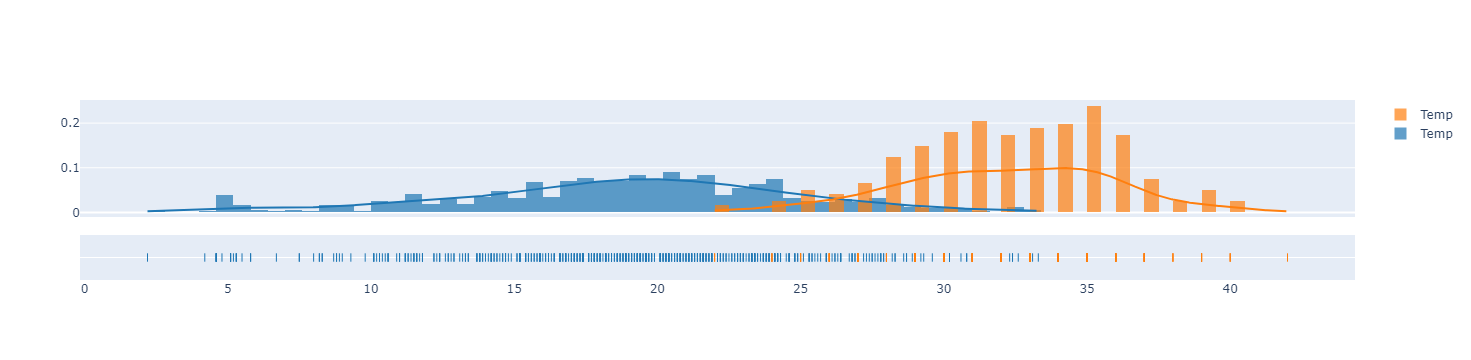

In [17]:
import plotly.figure_factory as ff
import numpy as np

# Group data together
hist_data = [list(copy_df_portugal['Temp']), list(copy_df_algeria['Temp'])]

group_labels = ['Temp','Temp']

# Create distplot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels, bin_size=[0.6,0.5,1])
fig.show()

## Normalize the Data

In [18]:
final_df = pd.concat([copy_df_portugal, copy_df_algeria], axis=0, ignore_index=True)
final_df

Temp  Humidity  Wind  Rain  FFMC   DMC     DC  ISI  Actual Fire
0     8.2      51.0   6.7   0.0  86.2  26.2   94.3  5.1          0.0
1    18.0      33.0   0.9   0.0  90.6  35.4  669.1  6.7          0.0
2    14.6      33.0   1.3   0.0  90.6  43.7  686.9  6.7          0.0
3     8.3      97.0   4.0   0.2  91.7  33.3   77.5  9.0          0.0
4    11.4      99.0   1.8   0.0  89.3  51.3  102.2  9.6          0.0
..    ...       ...   ...   ...   ...   ...    ...  ...          ...
756  30.0      65.0  14.0   0.0  85.4  16.0   44.5  4.5          1.0
757  28.0      87.0  15.0   4.4  41.1   6.5    8.0  0.1          0.0
758  27.0      87.0  29.0   0.5  45.9   3.5    7.9  0.4          0.0
759  24.0      54.0  18.0   0.1  79.7   4.3   15.2  1.7          0.0
760  24.0      64.0  15.0   0.2  67.3   3.8   16.5  1.2          0.0

[761 rows x 9 columns]

In [19]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler() 
scaled_values = scaler.fit_transform(final_df) 
final_df.loc[:,:] = scaled_values
final_df

Temp  Humidity      Wind      Rain      FFMC       DMC        DC  \
0    0.150754  0.423529  0.220280  0.000000  0.870968  0.087749  0.102378   
1    0.396985  0.211765  0.017483  0.000000  0.927742  0.119408  0.775682   
2    0.311558  0.211765  0.031469  0.000000  0.927742  0.147970  0.796533   
3    0.153266  0.964706  0.125874  0.011905  0.941935  0.112182  0.082699   
4    0.231156  0.988235  0.048951  0.000000  0.910968  0.174123  0.111632   
..        ...       ...       ...       ...       ...       ...       ...   
756  0.698492  0.588235  0.475524  0.000000  0.860645  0.052650  0.044044   
757  0.648241  0.847059  0.510490  0.261905  0.289032  0.019959  0.001289   
758  0.623116  0.847059  1.000000  0.029762  0.350968  0.009635  0.001171   
759  0.547739  0.458824  0.615385  0.005952  0.787097  0.012388  0.009722   
760  0.547739  0.576471  0.510490  0.011905  0.627097  0.010668  0.011245   

          ISI  Actual Fire  
0    0.090909          0.0  
1    0.119430          0.0  
2    0.119430          0.0  
3    0.160428          0.0  
4    0.171123          0.0  
..        ...          ...  
756  0.080214          1.0  
757  0.001783          0.0  
758  0.007130          0.0  
759  0.030303          0.0  
760  0.021390          0.0  

[761 rows x 9 columns]

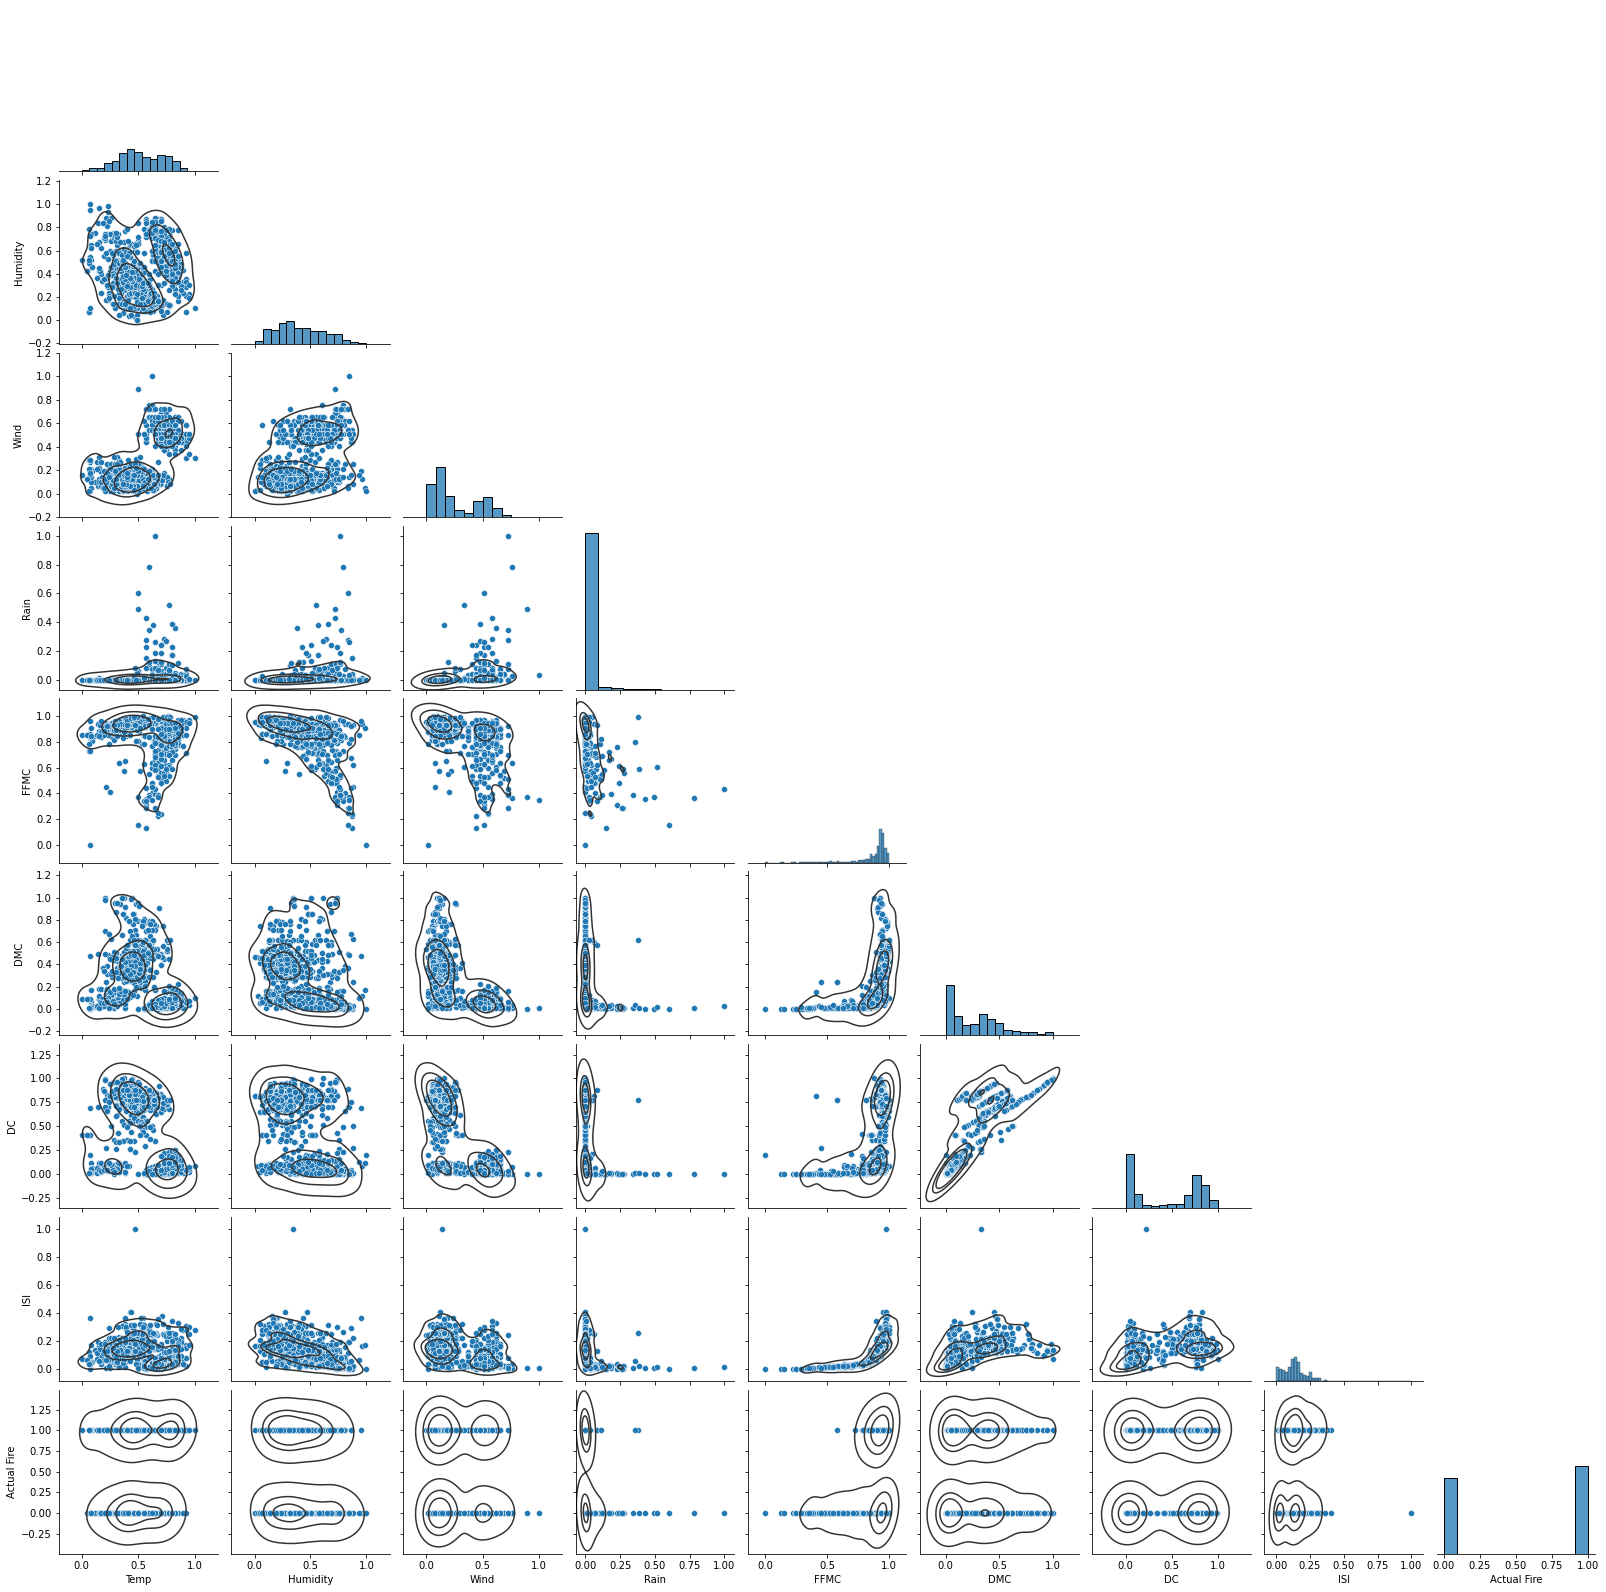

In [20]:
pairplot_final = sns.pairplot(final_df, diag_kind="hist",  corner=True)
pairplot_final.map_lower(sns.kdeplot, levels=4, color=".2")

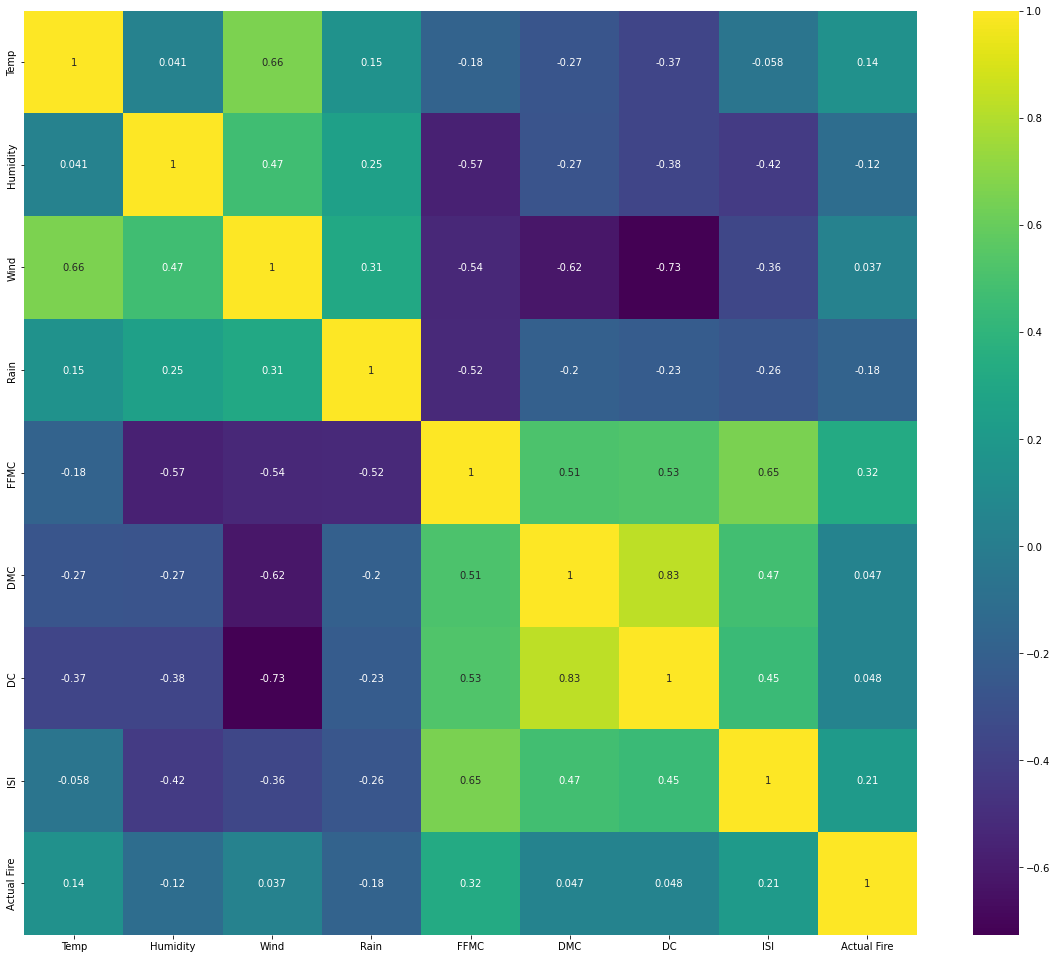

In [30]:
plt.figure(figsize=(20,17))
sns.heatmap(final_df.corr(),vmax=1, annot=True,cmap='viridis')
plt.show()

In [22]:
final_df['Actual Fire'].value_counts()

1.0    407
0.0    353
Name: Actual Fire, dtype: int64

## Building The Model

Outline of building model:
split training and testing sets
create model

In [266]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from keras.models import Input, Model
from keras.layers import Dense
import tensorflow_addons as tfa

In [95]:
classification_x = final_df.iloc[:,: -1].values
classification_y = final_df.iloc[:,-1 : ].values

In [96]:
print(classification_x.shape, classification_y.shape)

(761, 8) (761, 1)


In [97]:
regression_x = final_df.iloc[:,: -2].values
regression_y = final_df.iloc[:,-2:-1].values

In [98]:
print(regression_x.shape, regression_y.shape)

(761, 7) (761, 1)


In [275]:
X_train_cl, X_test_cl, y_train_cl, y_test_cl = train_test_split(classification_x,classification_y, test_size=0.33, random_state=0)
X_train_rg, X_test_rg, y_train_rg, y_test_rg = train_test_split(regression_x,regression_y, test_size=0.33, random_state=0)

In [281]:
# Build the model with Functional API
inputs_class = Input(shape=(8,))
layer_class = Dense(8,input_shape=(8,), kernel_initializer='normal',activation='relu')(inputs_class)
layer_class = Dense(4, kernel_initializer='normal',activation='relu')(layer_class)
output_class = Dense(1, kernel_initializer='normal', activation='softmax')(layer_class)

inputs_reg = Input(shape=(7,))
layer_reg = Dense(7,input_shape=(7,), kernel_initializer='normal',activation='relu')(inputs_reg)
layer_reg = Dense(3, kernel_initializer='normal',activation='relu')(layer_reg)
output_reg = Dense(1, kernel_initializer='normal', activation='relu')(layer_reg)

model = Model(inputs=[inputs_class,inputs_reg], outputs=[output_class,output_reg],name="double_model")

In [282]:
keras.utils.plot_model(model, "double_model.png", show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [278]:
# Compile the model 
multiOpt = tfa.optimizers.MultiOptimizer(
    [(opt, output_class), (opt, output_reg)]
)
c_model.compile(
    loss=['sparse_categorical_crossentropy', 'mean_squared_error'],
    optimizer=multiOpt,
    metrics=['accuracy', 'accuracy']
)
# c_model.compile(optimizer=['sgd','adam'],
#                        loss = [tf.keras.losses.BinaryCrossentropy(from_logits=False,),'mean_squared_error'],
#                        metrics=['accuracy','accuracy'])


AttributeError: 'KerasTensor' object has no attribute 'weights'

In [262]:
c_model.fit(x=X_train, y=y_train, epochs = 10, 
                   validation_data = (X_test, y_test))

Epoch 1/10


AttributeError: in user code:

    File "C:\Users\Johnny\Documents\Anaconda\lib\site-packages\keras\engine\training.py", line 1021, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\Johnny\Documents\Anaconda\lib\site-packages\keras\engine\training.py", line 1010, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Johnny\Documents\Anaconda\lib\site-packages\keras\engine\training.py", line 1000, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\Johnny\Documents\Anaconda\lib\site-packages\keras\engine\training.py", line 863, in train_step
        self.optimizer.minimize(loss, self.trainable_variables, tape=tape)

    AttributeError: 'ListWrapper' object has no attribute 'minimize'
